# Pre-requisite Tasks

Get training and test sets

In [ ]:
# Upload the dataset from it's source to Collab
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip

--2023-04-21 20:26:27--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276294756 (263M) [application/zip]
Saving to: ‘GTSRB_Final_Training_Images.zip’

GTSRB_Final_Trainin 100%[===================>] 263.50M  13.4MB/s    in 22s     

2023-04-21 20:26:50 (12.0 MB/s) - ‘GTSRB_Final_Training_Images.zip’ saved [276294756/276294756]



In [ ]:
# unzip the dataset
!unzip GTSRB_Final_Training_Images.zip

Streaming output truncated to the last 5000 lines.
  inflating: GTSRB/Final_Training/Images/00035/00000_00019.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00020.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00021.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00022.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00023.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00024.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00025.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00026.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00027.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00028.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00029.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00001_00000.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00001_00001.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00001_00002.ppm  
  inflating: GTSRB/Final_Training/Image

In [ ]:
# Get final test set with classess
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip
!unzip GTSRB_Final_Test_Images.zip

Streaming output truncated to the last 5000 lines.
  inflating: GTSRB/Final_Test/Images/07632.ppm  
  inflating: GTSRB/Final_Test/Images/07633.ppm  
  inflating: GTSRB/Final_Test/Images/07634.ppm  
  inflating: GTSRB/Final_Test/Images/07635.ppm  
  inflating: GTSRB/Final_Test/Images/07636.ppm  
  inflating: GTSRB/Final_Test/Images/07637.ppm  
  inflating: GTSRB/Final_Test/Images/07638.ppm  
  inflating: GTSRB/Final_Test/Images/07639.ppm  
  inflating: GTSRB/Final_Test/Images/07640.ppm  
  inflating: GTSRB/Final_Test/Images/07641.ppm  
  inflating: GTSRB/Final_Test/Images/07642.ppm  
  inflating: GTSRB/Final_Test/Images/07643.ppm  
  inflating: GTSRB/Final_Test/Images/07644.ppm  
  inflating: GTSRB/Final_Test/Images/07645.ppm  
  inflating: GTSRB/Final_Test/Images/07646.ppm  
  inflating: GTSRB/Final_Test/Images/07647.ppm  
  inflating: GTSRB/Final_Test/Images/07648.ppm  
  inflating: GTSRB/Final_Test/Images/07649.ppm  
  inflating: GTSRB/Final_Test/Images/07650.ppm  
  inflating: GTSRB

In [ ]:
# Get final test set with classess
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_GT.zip
!unzip GTSRB_Final_Test_GT.zip

--2023-04-21 20:27:25--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_GT.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99620 (97K) [application/zip]
Saving to: ‘GTSRB_Final_Test_GT.zip’

GTSRB_Final_Test_GT 100%[===================>]  97.29K   147KB/s    in 0.7s    

2023-04-21 20:27:26 (147 KB/s) - ‘GTSRB_Final_Test_GT.zip’ saved [99620/99620]

Archive:  GTSRB_Final_Test_GT.zip
  inflating: GT-final_test.csv       


Import all necessary libraries

In [ ]:
import math
import numpy as np
import pandas as pd
import os
import cv2

import tensorflow as tf
import pickle as pkl
import torch
from torch import nn
from torch import optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random
from skimage import transform,io,color,exposure

import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.image import imread
import seaborn as sns

np.random.seed(42)

# Data Loading

Global variables

In [ ]:
# VARIABLE DEFINITIONS

# dataset path
# The data should be organized as the following structure
#data_dir = './GTSRB'
#train_path = './GTSRB/Final_Training/Images'
#test_path = './GTSRB/Final_Test'

# Specify the dataset path
data_path = './GTSRB'
train_path = './GTSRB/Final_Training/Images'
test_path = './GTSRB/Final_Test/Images'


# Resizing the images to 30x30x3 - standard for image classification
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

# number of categories defined in the data
NUM_CATEGORIES = len(os.listdir(train_path))

# Label Overview - classes defined in the dataset
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }


class_names = list(classes.values())

Create train and validation data splits

In [ ]:
def filter_csv(train_files, class_labels):
    ret_files = []
    ret_labels = []

    for i, file in enumerate(train_files):
        if not '.csv' in file:
            ret_files.append(file)
            ret_labels.append(class_labels[i])

    return ret_files, ret_labels

def index_list(input_list, indices):
    new_list = [input_list[i] for i in indices]

    return new_list


def list_files(path):
    files = os.listdir(path)
    return [file for file in files if 'aug_' not in file]


folders = os.listdir(train_path)
train_number = []
class_num = []

all_files = []
all_class_labels =[]


# load all files
for folder in folders:
    train_files = list_files(train_path + '/' + folder)
    for file in train_files:
        all_files.append(train_path + '/' + folder + '/' + file)
        all_class_labels.append(int(folder))

files_no_csv, filter_labels_no_csv = filter_csv(all_files, all_class_labels)

# randomly split files into 70% and 30% for training and validation
seventy_percent = int(0.7 * len(files_no_csv))

mylist = []
nums = 0
while(True):
    x = random.randint(0, len(files_no_csv)-1)
    if not(x in mylist):
        mylist.append(x)
        nums += 1

    if nums == seventy_percent:
        break


invert_list = list(set(list(range(0, len(files_no_csv)))).difference(set(mylist)))


# save the split file
save_dict = {
    'train_files': index_list(files_no_csv, mylist),
    'train_labels': index_list(filter_labels_no_csv, mylist),

    'val_files': index_list(files_no_csv, invert_list),
    'val_labels': index_list(filter_labels_no_csv, invert_list)
}

save_file = "./train_val_split.pkl"

with open(save_file, 'wb') as f:
    pkl.dump(save_dict, f)

Dataloader for training and validation

In [ ]:

def to_categorical(y, num_classes):
    """ 1-hot encodes a tensor """
    return np.eye(num_classes, dtype='uint8')[y]

class ImageDataset(Dataset):
    def __init__(self, type_val_train, jitter = 0.5, rotation = 30 ):
        """
        Args:
        """
        # transform definitino
        self.transforms =  transforms.Compose([
        transforms.ToPILImage(),
        transforms.ColorJitter(contrast=jitter),
        transforms.RandomRotation(rotation),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

        # open split file
        save_file = "./train_val_split.pkl"


        with open(save_file, 'rb') as f:
            data = pkl.load(f)

        if type_val_train == "train":
            self.files = data['train_files']
            self.labels = data['train_labels']

        else:
            self.files = data['val_files']
            self.labels = data['val_labels']

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        """
            Get the data corresponding to the idx
        """
        file = self.files[idx]
        label = self.labels[idx]

        image = np.asarray(Image.open(file))
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = np.asarray(image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH)))

        image = self.transforms(resize_image)
        ret_dict = {
            'image': image,
            'label': torch.tensor(label, dtype = torch.long)
        }
        return ret_dict


if __name__ == "__main__":
    dataset_new = ImageDataset('val')
    dataset_new[0]

Dataloader for testing  

In [ ]:

def to_categorical(y, num_classes):
    """ 1-hot encodes a tensor """
    return np.eye(num_classes, dtype='uint8')[y]

class TestImageDataset(Dataset):
    def __init__(self):
        """
        Args:
        """
        test_path  = './GTSRB/Final_Test/Images'
        labels = './GT-final_test.csv'
        import csv

        rows = []

        with open(labels, newline='') as csvfile:
            spamreader = csv.reader(csvfile, delimiter = ';')
            for row in spamreader:
                rows.append(row)

        # print(rows)
        folders = os.listdir(test_path)

        all_files = []
        all_class_labels =[]

        for i, row in enumerate(rows):
            if i == 0:
                continue

            filename = './GTSRB/Final_Test/Images/{}'.format(row[0])
            all_files.append(filename)
            class_label = row[-1]
            all_class_labels.append(class_label)

        self.transforms =  transforms.Compose([
        transforms.ToPILImage(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
        ])
        self.files = all_files
        self.labels = all_class_labels
        ## open csv file
        # find the true class

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        """
            Get the data corresponding to the idx
        """
        file = self.files[idx]
        label = self.labels[idx]

        image = np.asarray(Image.open(file))
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = np.asarray(image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH)))

        image = self.transforms(resize_image)

        ret_dict = {
            'image': image,
            'label': torch.tensor(int(label), dtype = torch.long)
        }

        return ret_dict

# Model Implementation

Network definition

In [ ]:

# network definition
class Classifier(nn.Module):
    def __init__(self, input_dim=512, output_dim=43):
        super(Classifier, self).__init__()

        # convolution layers
        self.conv2d_a = nn.Conv2d(3, 16, kernel_size=(3,3))
        self.conv2d_b  = nn.Conv2d(16, 32, kernel_size=(3,3))

        # maxpool layers
        self.maxpool1 = nn.MaxPool2d((2, 2))
        self.batchnorm1 = nn.BatchNorm2d(32)

        # convolution layers
        self.conv2d_c = nn.Conv2d(32, 32, kernel_size=(3,3))
        self.conv2d_d  = nn.Conv2d(32, 32, kernel_size=(3,3))

        ##
        self.maxpool2 = nn.MaxPool2d((2, 2))
        self.batchnorm2 = nn.BatchNorm2d(32)

        self.layer_1 = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        # the forward pass through the network
        bs, c, h, w= x.shape

        # forward pass through one set of convolutions, maxpool and batchnorm layers
        x = self.batchnorm1(self.maxpool1(self.conv2d_b(self.conv2d_a(x))))

        # forward pass through one set of convolutions, maxpool and batchnorm layers
        x = self.batchnorm2(self.maxpool2(self.conv2d_d(self.conv2d_c(x))))

        new_x = torch.reshape(x, (bs, -1))

        # pass through the linear layer of the network
        x = torch.nn.functional.relu(self.layer_1(new_x))
        x = torch.nn.functional.sigmoid(x)
        return x

network = Classifier()
from torchsummary import summary

summary(network, (3, 30, 30), device="cpu")


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             448
            Conv2d-2           [-1, 32, 26, 26]           4,640
         MaxPool2d-3           [-1, 32, 13, 13]               0
       BatchNorm2d-4           [-1, 32, 13, 13]              64
            Conv2d-5           [-1, 32, 11, 11]           9,248
            Conv2d-6             [-1, 32, 9, 9]           9,248
         MaxPool2d-7             [-1, 32, 4, 4]               0
       BatchNorm2d-8             [-1, 32, 4, 4]              64
            Linear-9                   [-1, 43]          22,059
Total params: 45,771
Trainable params: 45,771
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.40
Params size (MB): 0.17
Estimated Total Size (MB): 0.59
---------------------------------------------

Execution with hyperparameter tuning
-
Train the main network. Print test results

In [ ]:
contrasts = [0, 0.5]
rotation = [0,  90]
lrs = [0.0001, 0.00001]

batches = [8, 32]



results = {}


max_test = 0
num_val = 0

save_losses = []
for rot in rotation:
    for contrast in contrasts:
        for lr in lrs:
            for batch in batches:
                num_val = num_val + 1

                print("==============")
                print(num_val)
                print("==============")

                print("hyperparmeters",rot, contrast, lr, batch)
                hyper_set = (lr, batch, contrast, rot)

                train_set = ImageDataset('train', contrast, rot)
                val_set = ImageDataset('val')
                test_set = TestImageDataset()

                epochs = 15

                # create network
                network = Classifier().cuda()
                opt = torch.optim.Adam(lr=lr, params = network.parameters())

                # define loss
                loss = torch.nn.CrossEntropyLoss()

                # this defines the dataloader for training
                dataloader_train = DataLoader(train_set, batch_size = batch, num_workers = 8)

                # this defines the dataloader for testing
                dataloader_test = DataLoader(test_set, batch_size = batch, num_workers = 8)

                # this defines the dataloader for validation
                dataloader_val =  iter(DataLoader(val_set, batch_size = batch, num_workers = 8))

                loss_allls =[]

                # iterate over the epochs
                for epoch in range(epochs):

                    # iterate over training dataloader
                    for i, dict in enumerate(dataloader_train):

                        # get the image
                        img = dict['image'].cuda()
                        # get the gt label
                        gt = dict['label'].cuda()

                        # define the optimizer
                        opt.zero_grad()

                        # pipe the image through the network
                        output = network(img)

                        # compute loss
                        loss_val = loss(output, gt)

                        loss_allls.append(loss_val.item())

                        # run backprop
                        loss_val.backward()

                        # take an optimization step
                        opt.step()

                        # every 100 iterations, evaluate the model on the validation set
                        if i%500 == 0:
                            val_dict = next(dataloader_val)
                            val_img = val_dict['image'].cuda()
                            val_gt = val_dict['label'].cuda()

                            with torch.no_grad():
                                output = network(val_img)

                            validation_loss = loss(output, val_gt)
                            acc = (torch.argmax(output, 1) == val_gt).float().mean()

                            print("Epoch {} Iteration {}".format(epoch, i))
                            print("Validation loss", validation_loss.item())
                            print("Validation Accuracy {} %".format(acc.item() * 100))

                    # check the method on test dataset every two epochs

                    if epoch % 2 == 0:
                        all_accs = []
                        for i, dict in enumerate(dataloader_test):
                            img = dict['image'].cuda()
                            gt = dict['label'].cuda()

                            with torch.no_grad():
                                output = network(img)

                            acc = (torch.argmax(output, 1) == gt).float().mean()
                            all_accs.append(acc.cpu().numpy())
                        print('========================\n TEST ACCURACY {} %\n ========================'.format((np.mean(all_accs)*100)))

                results[hyper_set] = np.mean(all_accs)*100
                if np.mean(all_accs)* 100 > max_test :
                    max_test = np.mean(all_accs)* 100
                    torch.save(network.state_dict(), './save_network.pt')
                    save_losses = loss_allls



1
hyperparmeters 0 0 0.0001 8


/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 0 Iteration 0
Validation loss 3.7535817623138428
Validation Accuracy 0.0 %
Epoch 0 Iteration 500
Validation loss 3.7435429096221924
Validation Accuracy 0.0 %
Epoch 0 Iteration 1000
Validation loss 3.5983409881591797
Validation Accuracy 25.0 %
Epoch 0 Iteration 1500
Validation loss 3.6753427982330322
Validation Accuracy 12.5 %
Epoch 0 Iteration 2000
Validation loss 3.657042980194092
Validation Accuracy 25.0 %
Epoch 0 Iteration 2500
Validation loss 3.6132140159606934
Validation Accuracy 50.0 %
Epoch 0 Iteration 3000
Validation loss 3.6171703338623047
Validation Accuracy 25.0 %
 TEST ACCURACY 69.03895139694214 %
Epoch 1 Iteration 0
Validation loss 3.598670721054077
Validation Accuracy 50.0 %
Epoch 1 Iteration 500
Validation loss 3.689016819000244
Validation Accuracy 25.0 %
Epoch 1 Iteration 1000
Validation loss 3.576833486557007
Validation Accuracy 50.0 %
Epoch 1 Iteration 1500
Validation loss 3.664071559906006
Validation Accuracy 25.0 %
Epoch 1 Iteration 2000
Validation loss 3.6073

# Results and Result Analysis

Test accuracies for each Hyperparameter set

In [ ]:
for ind_res, val in results.items():
  print("HYPERPARAMETER learning rate {}, batch {}, jitter {}, rotation {}".format(ind_res[0], ind_res[1], ind_res[2], ind_res[3]))
  print("TEST ACCURACY {} \n".format(val))

HYPERPARAMETER learning rate 0.0001, batch 8, jitter 0, rotation 0
TEST ACCURACY 94.36880350112915 

HYPERPARAMETER learning rate 0.0001, batch 32, jitter 0, rotation 0
TEST ACCURACY 93.06314587593079 

HYPERPARAMETER learning rate 1e-05, batch 8, jitter 0, rotation 0
TEST ACCURACY 79.79997396469116 

HYPERPARAMETER learning rate 1e-05, batch 32, jitter 0, rotation 0
TEST ACCURACY 67.23461151123047 

HYPERPARAMETER learning rate 0.0001, batch 8, jitter 0.5, rotation 0
TEST ACCURACY 95.35835385322571 

HYPERPARAMETER learning rate 0.0001, batch 32, jitter 0.5, rotation 0
TEST ACCURACY 92.88550019264221 

HYPERPARAMETER learning rate 1e-05, batch 8, jitter 0.5, rotation 0
TEST ACCURACY 80.98743557929993 

HYPERPARAMETER learning rate 1e-05, batch 32, jitter 0.5, rotation 0
TEST ACCURACY 65.1898741722107 

HYPERPARAMETER learning rate 0.0001, batch 8, jitter 0, rotation 90
TEST ACCURACY 75.62803030014038 

HYPERPARAMETER learning rate 0.0001, batch 32, jitter 0, rotation 90
TEST ACCURACY 

Loss Curve

<ipython-input-14-9c359acc2af4>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data = save_losses, palette = 'hot_r', ax = ax1)


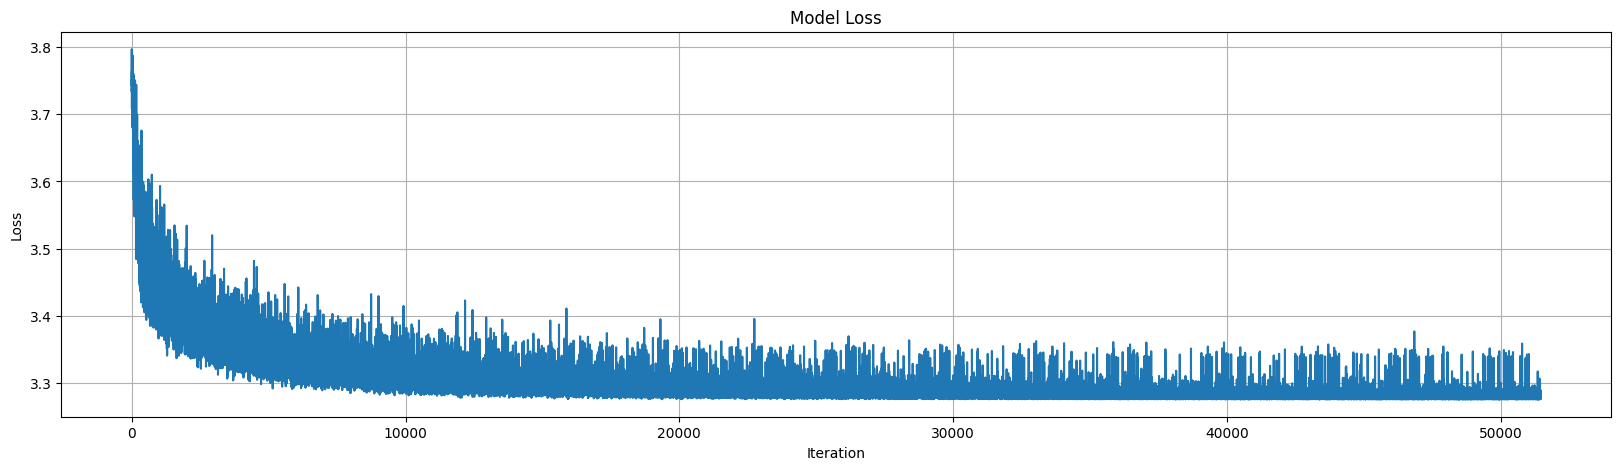

In [ ]:
fig, (ax1) = plt.subplots(1,1, figsize=(20,5))
sns.lineplot(data = save_losses, palette = 'hot_r', ax = ax1)
ax1.set_title('Model Loss')
ax1.set(xlabel='Iteration', ylabel='Loss')
ax1.grid()


Result Analysis

In [ ]:
# predicted class labels for each image in the test dataset
all_pred = []
# ground truth class labels for each image in the test dataset
all_gtl = []
# all images in the test dataset
all_imgs = []

dataloader_test = DataLoader(test_set, batch_size = 1, num_workers = 1)


network = Classifier()
network.load_state_dict(torch.load('./save_network.pt'))

for i, dict_enum in enumerate(dataloader_test):
    img = dict_enum['image']
    gt = dict_enum['label']

    with torch.no_grad():
        output = network(img)

    acc = (torch.argmax(output, 1) == gt).float().mean()
    all_pred.append(torch.argmax(output, 1).cpu().numpy()[0])
    all_gtl.append(gt.cpu().numpy()[0])

    all_imgs.append(img)



Confirming Model Results


In [ ]:
#print(all_pred)
#print(all_gtl)

true_vals = 0

for i in range(len(all_pred)):
  if all_pred[i] == all_gtl[i]:
    true_vals = true_vals +1

print(f'Number of accurate predictions:{true_vals}')
print(f'Number of total predictions: {len(all_pred)}')
print(f'\nAccuracy percentage: {true_vals/len(all_pred)*100}')

Number of accurate predictions:11960
Number of total predictions: 12630

Accuracy percentage: 94.69517022961203


Confusion Matrix

<Axes: >

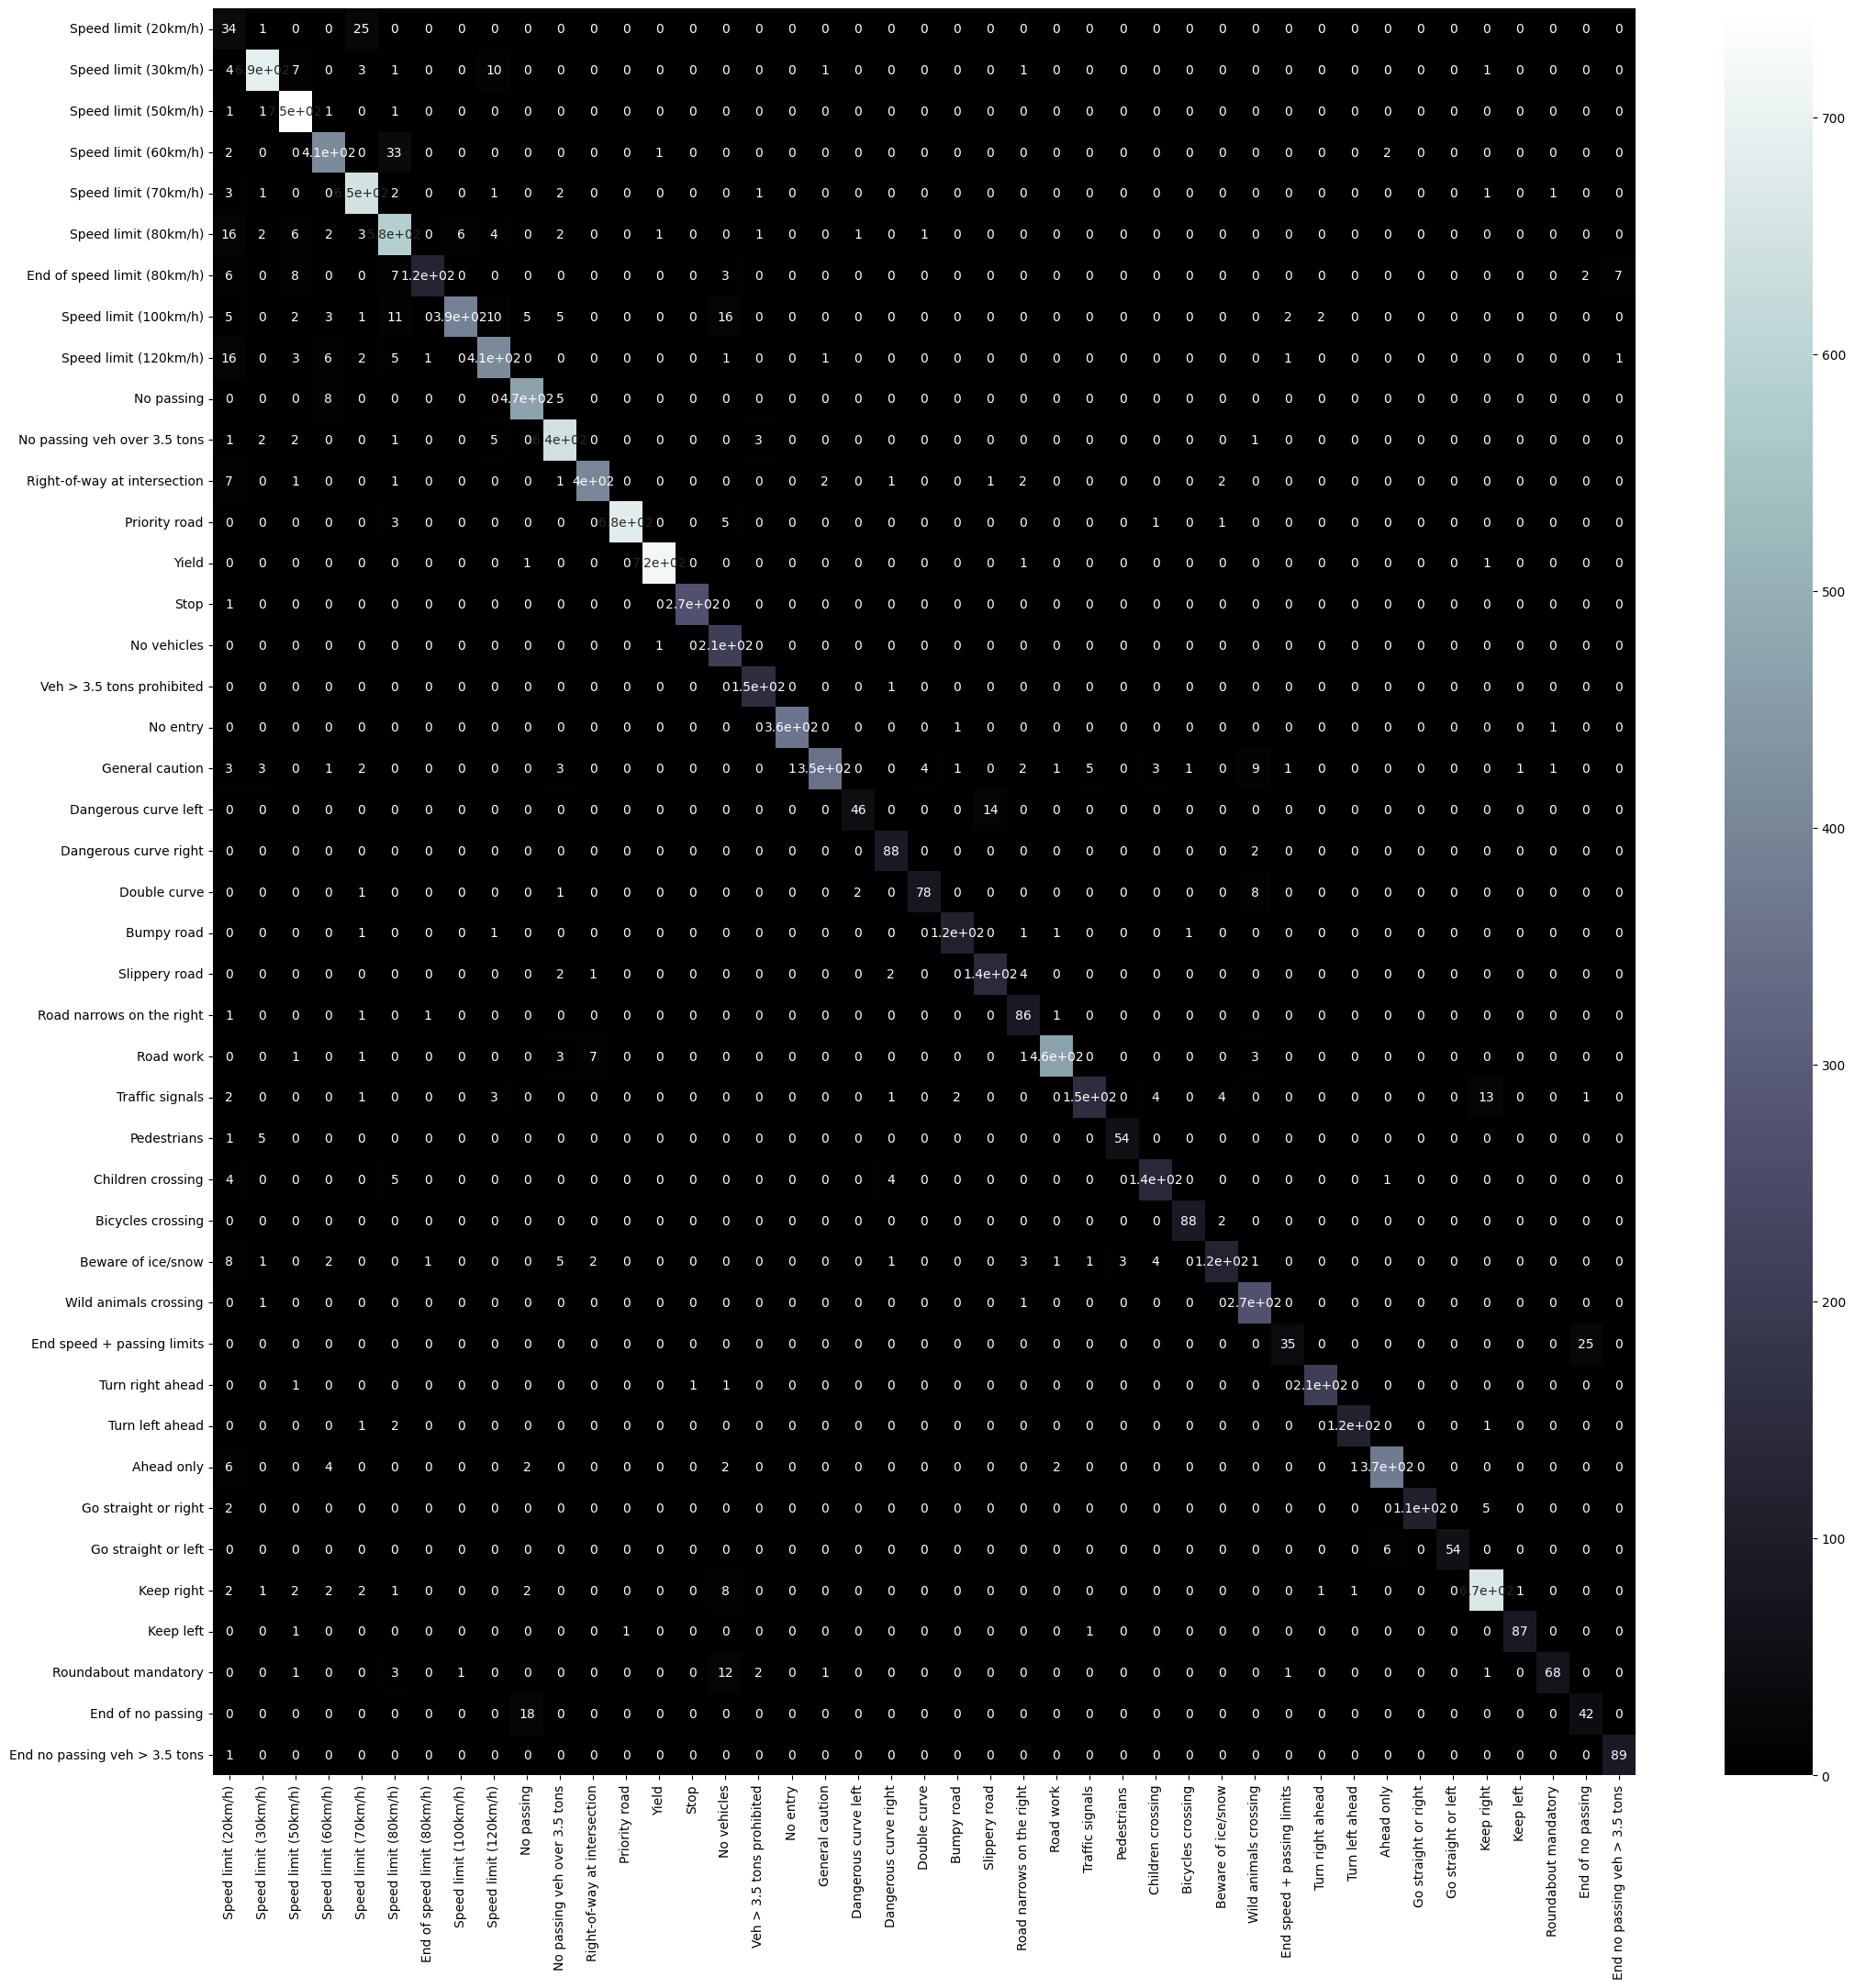

In [ ]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(all_gtl, all_pred)
cfm_df = pd.DataFrame(cfm, index = class_names, columns = class_names)

plt.figure(figsize = (25,25))
sns.heatmap(cfm_df, cmap = 'bone', fmt = '.2g', annot=True)

Classification Report

In [ ]:
from sklearn.metrics import classification_report
from matplotlib.font_manager import FontProperties


report = classification_report(all_gtl, all_pred, target_names=classes.values(), output_dict=True)
cr_df = pd.DataFrame(report).transpose()
cr_df.reset_index(inplace = True)
cr_df.columns = ['Class Names', 'Precision', 'Recall', 'F1-Score', 'Support']
# cr_df = pd.DataFrame(cr)
cr_df

# fig, ax =plt.subplots(figsize=(20,17))
# ax.axis('tight')
# ax.axis('off')

# # Create a table and add it to the axis object
# table = ax.table(cellText=cr_df.values, colLabels=cr_df.columns, loc='center')

# # Set the font size for the table cells
# table.set_fontsize(18)

# # Save the figure as a PNG file
# fig.savefig('classification_report.png', dpi=3000)

,Class Names,Precision,Recall,F1-Score,Support
0,Speed limit (20km/h),0.269841,0.566667,0.365591,60.000000
1,Speed limit (30km/h),0.974648,0.961111,0.967832,720.000000
2,Speed limit (50km/h),0.955186,0.994667,0.974526,750.000000
3,Speed limit (60km/h),0.934240,0.915556,0.924804,450.000000
4,Speed limit (70km/h),0.936416,0.981818,0.958580,660.000000
5,Speed limit (80km/h),0.885023,0.928571,0.906274,630.000000
6,End of speed limit (80km/h),0.975000,0.780000,0.866667,150.000000
7,Speed limit (100km/h),0.982278,0.862222,0.918343,450.000000
8,Speed limit (120km/h),0.923937,0.917778,0.920847,450.000000
9,No passing,0.943434,0.972917,0.957949,480.000000


Predictions vs Actual classes

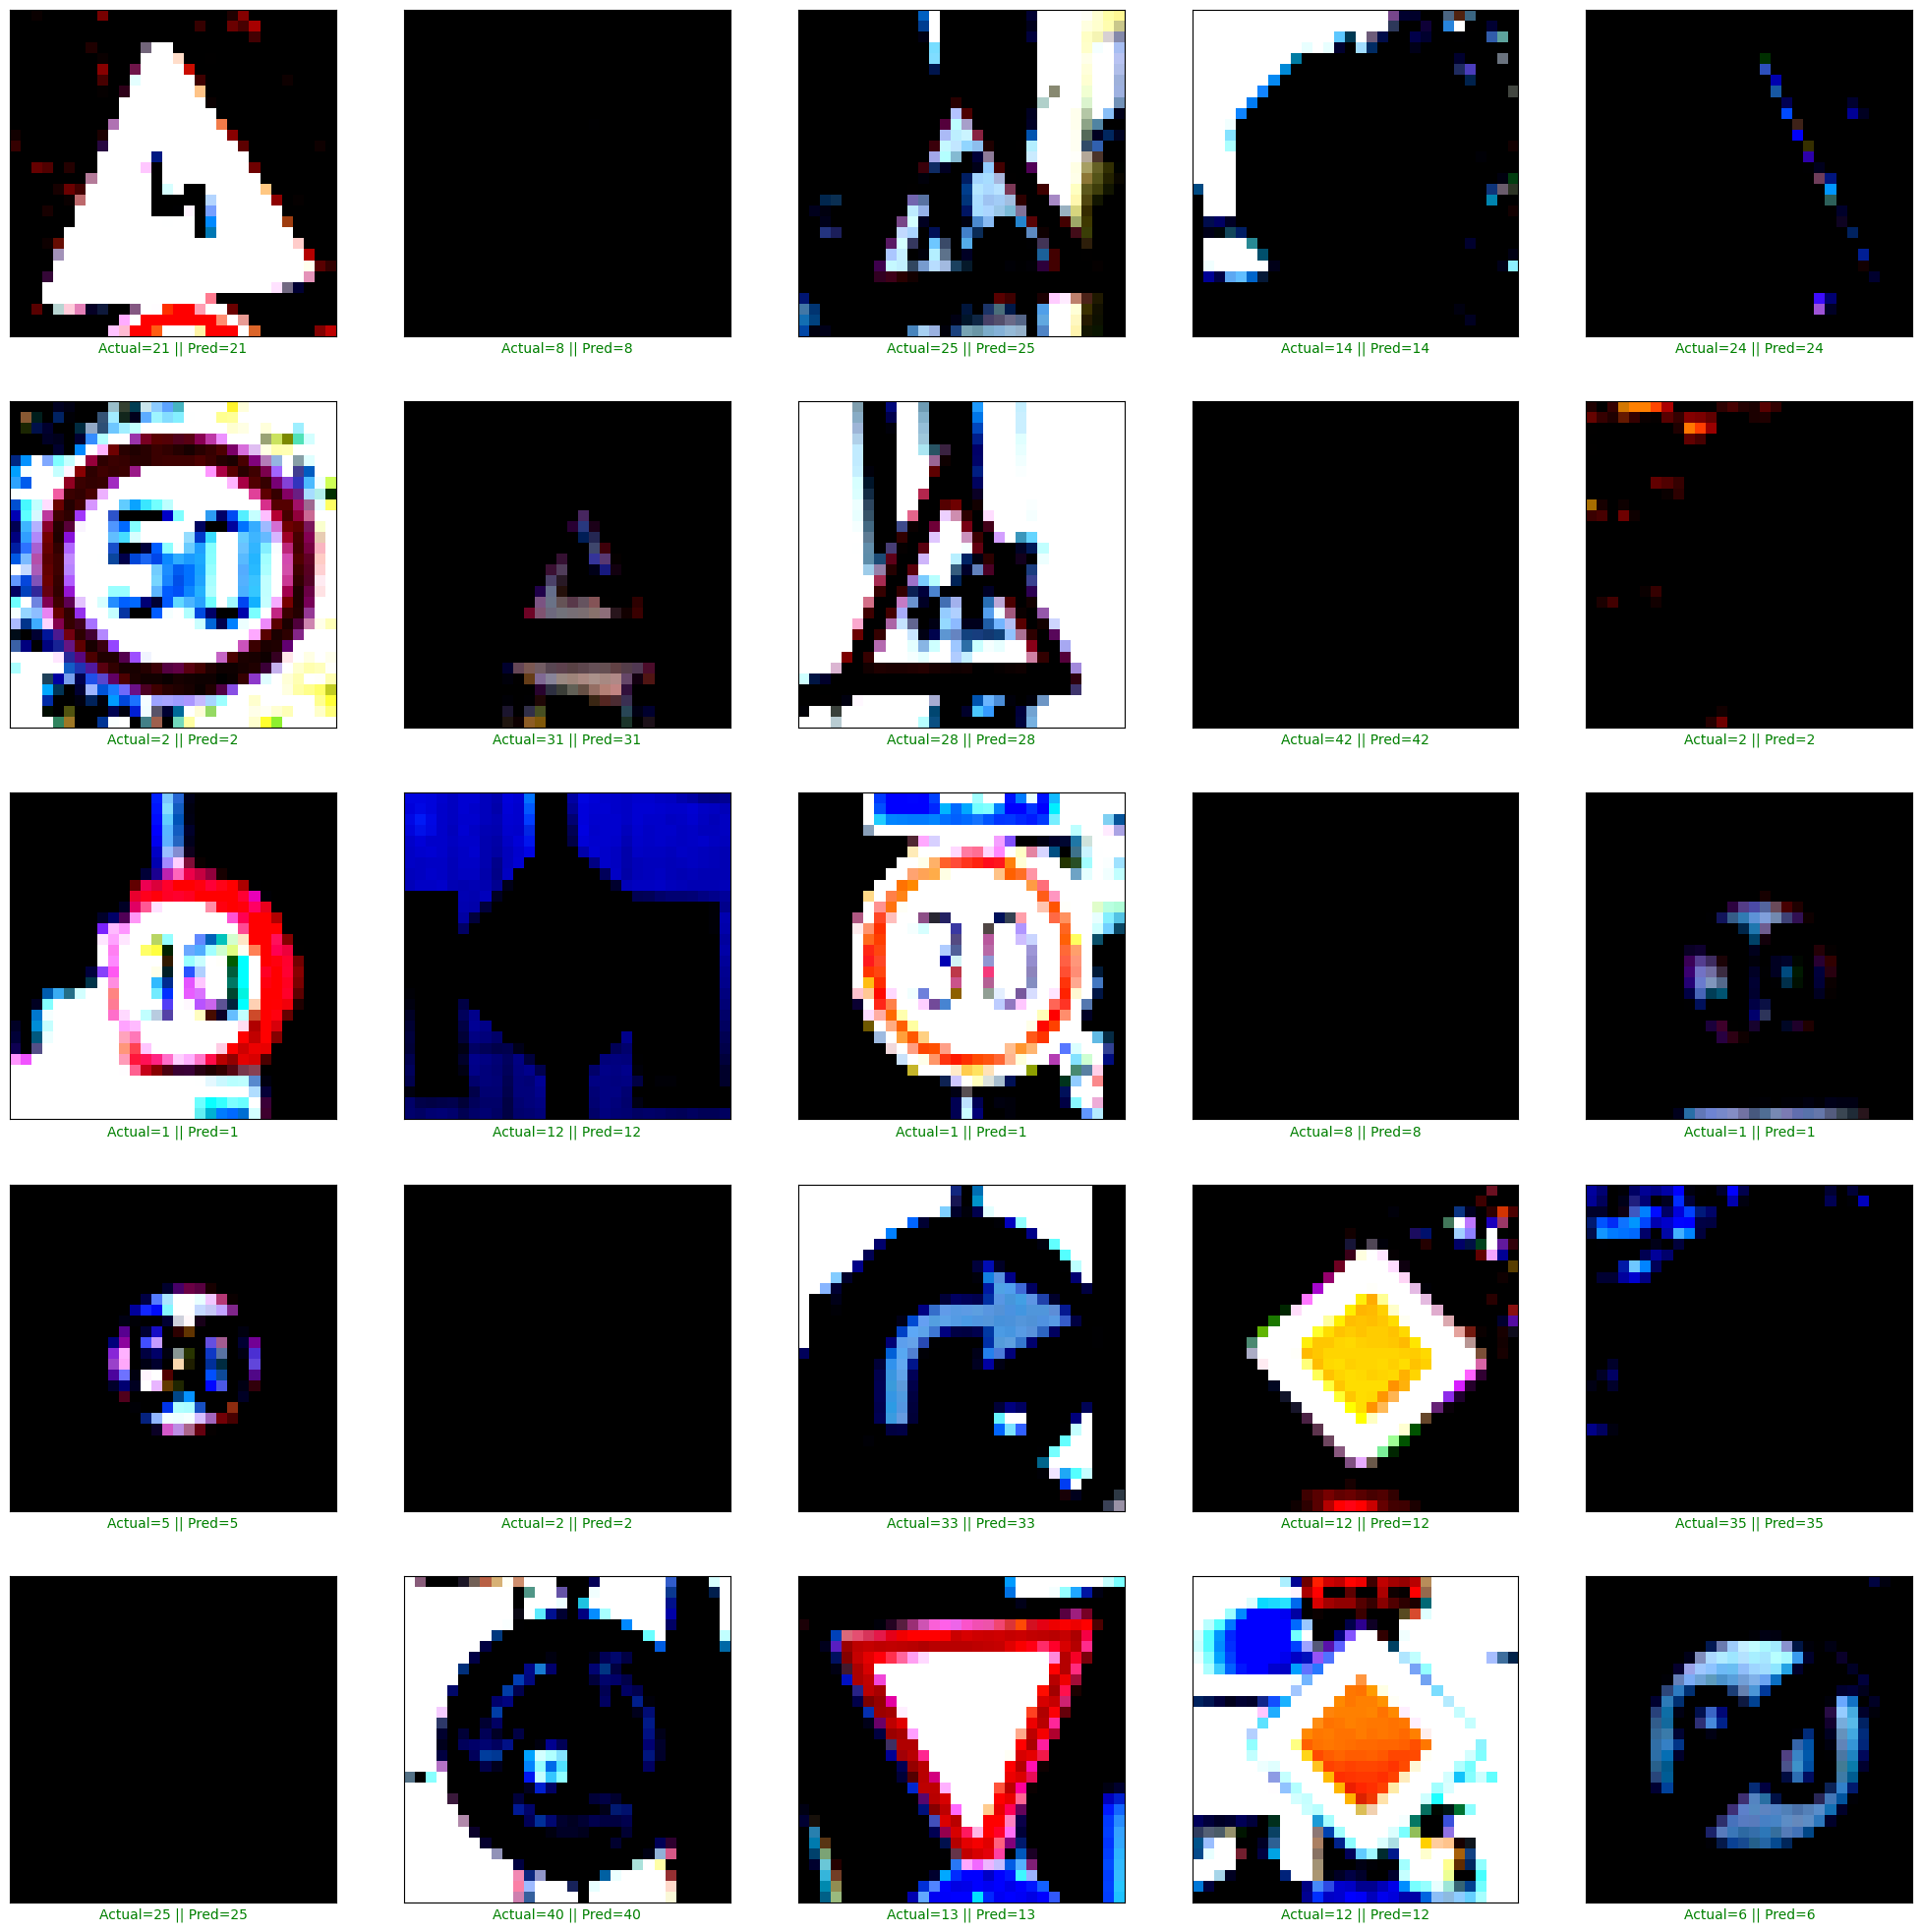

In [ ]:
plt.figure(figsize = (25, 25))

rand = random.randint(0,len(all_pred))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    rand = random.randint(0,len(all_pred))
    prediction = all_pred[rand]
    actual = all_gtl[rand]

    col = 'g'
    if prediction != actual:
        col = 'r'

    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    img_new = all_imgs[rand][0,:, :, :]
    img_new = np.swapaxes(img_new, 0, 1)
    img_new = np.swapaxes(img_new, 1, 2)

    plt.imshow(img_new)

plt.show()